In [1]:
# Import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Import the red wine dataset
redwine = pd.read_csv('winequality-red.csv', sep=';')
df = redwine.copy()

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 1. Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


The dataset contains 1,599 instances, with each column having the same number of entries and non-null values, indicating that there are no missing values.     

All features in the dataset are numerical (float), except for the quality column. Although the quality values are represented numerically, they actually belong to an ordinal scale—the scores have a meaningful order (e.g., 3 < 4 < 5), but the differences between the values are not guaranteed to be uniform. While this means quality should not be treated as a continuous variable for certain types of analysis (e.g., regression), its numeric representation still allows us to compute correlations to explore general relationships and trends between quality and other features.

In [5]:
# Find the number of duplicate rows in the DataFrame
df.duplicated().sum()

240

It appears that there are 240 duplicated rows in the dataset.

In [6]:
# Select and display the duplicate rows
duplicates = df[df.duplicated()]
duplicates.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.9966,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.9962,3.41,0.39,10.9,5


Although it's theoretically possible that they are different wines, the fact that all feature values are exactly the same makes this highly unlikely. Therefore, these entries will be considered duplicates and removed from the dataset.

In [7]:
# Remove all duplicate rows from the DataFrame and reset the index
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [9]:
df_2 = df.copy()
df_3 = df.copy()
df_4 = df.copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 127.5 KB


After removing the duplicate entries, the dataset now contains 1,359 instances.    
We now proceed to explore and gain deeper insights into the dataset.

# 2. Explorative Data Analysis

In [11]:
df.describe().T.style.background_gradient(cmap = "YlGnBu")

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.000000,8.310596,1.736990,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1359.000000,0.529478,0.183031,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1359.000000,0.272333,0.195537,0.000000,0.090000,0.260000,0.430000,1.000000
residual sugar,1359.000000,2.523400,1.352314,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1359.000000,0.088124,0.049377,0.012000,0.070000,0.079000,0.091000,0.611000
free sulfur dioxide,1359.000000,15.893304,10.447270,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1359.000000,46.825975,33.408946,6.000000,22.000000,38.000000,63.000000,289.000000
density,1359.000000,0.996709,0.001869,0.990070,0.995600,0.996700,0.997820,1.003690
pH,1359.000000,3.309787,0.155036,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1359.000000,0.658705,0.170667,0.330000,0.550000,0.620000,0.730000,2.000000


Next, we visualize the distribution of the features

In [12]:
# Define a color palette for the histograms
colors = px.colors.qualitative.Prism

# Set the grid size for subplots
rows, cols = 4, 3

# Get a list of feature names, excluding the 'quality' column
features = df.drop(columns=['quality']).columns.tolist()

# Create a subplot figure with titles for each feature
fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=features)

# Add a histogram for each feature
for i, col in enumerate(features):
    row = i // cols + 1      # Determine row index
    col_pos = i % cols + 1   # Determine column index
    fig.add_trace(
        go.Histogram(x=df[col], name=col, marker=dict(color=colors[i % len(colors)])),
        row=row, col=col_pos)

# Update layout settings for the entire figure
fig.update_layout(height=1000, width=1200, title_text="Value Distributions of Features", showlegend=False)
fig.show()


Next we will check the relationships between variables:

In [13]:
# Create a scatter matrix to visualize pairwise relationships between features, colored by wine quality
fig = px.scatter_matrix(
    df,
    dimensions=features,                  # Features to include in the scatter matrix
    color='quality',                      # Color points based on wine quality
    title="Scatter Matrix of Wine Features",
    color_continuous_scale='YlGnBu')

# Hide histograms on the diagonal to reduce clutter
fig.update_traces(diagonal_visible=False)

# Set the overall figure size
fig.update_layout(width=1400, height=1300)
fig.show()

From the scatter plot, we can see that some features—like fixed acidity and pH, or alcohol and density—are strongly correlated.     
This issue is known as multicollinearity, which occurs when two or more independent features share similar information.  

Multicollinearity can pose a problem for modeling(ML), as it makes it difficult to determine the individual contribution of each feature. This, in turn, can negatively impact our ability to accurately identify which attributes truly influence wine quality.

In [14]:
df['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [15]:
# Calculate the percentage distribution of wine quality scores
quality_percent = df['quality'].value_counts(normalize=True).sort_index().reset_index()
quality_percent.columns = ['quality', 'percentage']
quality_percent['percentage'] *= 100  # Convert to percentages

# Create a bar plot of wine quality distribution
fig = px.bar(
    quality_percent,
    x='quality',
    y='percentage',
    labels={'quality': 'Quality Score', 'percentage': 'Percentage (%)'},
    title="Wine Quality Distribution",
    text='percentage',  
    color_discrete_sequence=['#1d6996'])

fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside')

# Layout settings for figure size
fig.update_layout(width=800, height=500)
fig.show()

Here we notice another issue: the classes are imbalanced. There are many more average-quality wines compared to those with excellent or poor quality.

In [16]:
# Calculate the correlation matrix and round values for better readability
corr = df.corr().round(2)

# Create a Plotly heatmap showing correlation values
fig = go.Figure(data=go.Heatmap(
    z=corr.values,                
    x=corr.columns,              
    y=corr.columns,               
    text=corr.values,            
    texttemplate="%{text}",        
    textfont={"size": 12},      
    colorscale='YlGnBu',          
    zmin=-1, zmax=1,               
    colorbar=dict(title="Correlation"),  # Title for the colorbar
    showscale=True))

# Update layout with title and size
fig.update_layout(title="Correlation Between Wine Characteristics", width=900, height=800)
fig.show()

In [17]:
# Calculate the correlation of all features with 'quality'
df.corr(numeric_only=True)['quality'].drop('quality')

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
Name: quality, dtype: float64

**Positive correlations with quality:**     
Alcohol (0.48)     
Sulphates (0.25)    
Citric acid (0.23)      

**Negative correlations with quality**     
Volatile acidity (-0.40)     
Density (-0.18)     

We hypothesize that alcohol, sulphates, and citric acid have a positive influence on wine quality, meaning higher values of these features are associated with better wines.      
On the other hand, we expect that volatile acidity and density have a negative influence on quality, potentially lowering the perceived value of the wine as their levels increase.    

We begin with alcohol to see if our hypothesis holds true.

## Alcohol vs. Quality

In [18]:
fig = px.box(df,x='quality',y='alcohol',color='quality', color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(width=1000)
fig.show()

Starting from quality level 5, we observe that wines with higher alcohol content tend to have higher quality ratings. The boxplot supports our hypothesis, showing a clear upward trend in alcohol levels as quality increases.      

The highest quality wines tend to have an alcohol content between 9.8% and 14%.    

## Sulphates vs. Quality

In [19]:
fig = px.box(df,x='quality',y='sulphates',color='quality', color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(width=1000)
fig.show()

According to the box plot, there is a clear upward trend—wines with higher sulphate levels generally receive higher quality ratings, supporting our hypothesis.   

The highest quality wines generally have sulphate levels between 0.63 and 1.1.

## Citric acid vs. Quality

In [20]:
fig = px.box(df,x='quality',y='citric acid',color='quality', color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(width=1000)
fig.show()

As shown in the graph, higher levels of citric acid in wine are associated with better quality ratings.

The highest quality wines generally have citric acid levels between 0.03 and 0.72, further supporting the positive influence of citric acid on wine quality.

## Volatile acidity vs. Quality

In [21]:
fig = px.box(df,x='quality',y='volatile acidity',color='quality',color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(width=1000)
fig.show()

It can be observed that lower levels of volatile acidity are associated with higher wine quality.     
The highest quality wines typically have volatile acidity levels between 0.26 and 0.62, supporting the idea that lower volatile acidity contributes positively to overall quality.

## Density vs. Quality

In [22]:
fig = px.box(df,x='quality',y='density',color='quality',color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(width=1000)
fig.show()

There is a slight negative trend between density and wine quality—better quality wines tend to have lower density.

In [23]:
color_list = px.colors.qualitative.Prism 
quality_levels = sorted(df['quality'].unique())

color_map = {
    q: color_list[i % len(color_list)]
    for i, q in enumerate(quality_levels)}

In [24]:
# Number of rows and columns for the subplot grid
rows, cols = 4, 3

# Create a subplot with individual box plots for each feature
fig = sp.make_subplots(rows=rows, cols=cols, subplot_titles=features)

# Loop through each feature to plot
for i, feature in enumerate(features):
    row = i // cols + 1  # Determine subplot row
    col = i % cols + 1   # Determine subplot column

    # Add a box plot for each quality level within the feature
    for q in sorted(df['quality'].unique()):
        fig.add_trace(
            go.Box(
                y=df[df['quality'] == q][feature],  # Values for this quality level
                name=str(q),                        # Quality label
                boxmean=True,                       # Show mean line
                marker_color=color_map[q],          
                showlegend=False),
            row=row,
            col=col)

# Set figure size and title
fig.update_layout(height=1200, width=1500, title_text="Distributions of Wine Features by Quality Score", showlegend=False)
fig.show()

In [25]:
# Round the alcohol values to group them into whole number bins
df['rounded_alcohol'] = df['alcohol'].round()

# Create a box plot to show the relationship between alcohol, volatile acidity, and quality
fig = px.box(
    df,
    x='rounded_alcohol',                   # X-axis: alcohol levels
    y='volatile acidity',                  # Y-axis: volatile acidity
    color='quality',                       # Color-coded by wine quality
    color_discrete_sequence=px.colors.qualitative.Prism,
    title="Alcohol and Volatile Acidity by Wine Quality Rating")

# Customize layout and axis labels
fig.update_layout(xaxis_title="Alcohol", yaxis_title="Volatile Acidity", width=1000, height=600, legend_title="Quality")
fig.show()

In [26]:
# Create a box plot to show the relationship between alcohol levels, citric acid, and wine quality
fig = px.box(
    df,
    x='rounded_alcohol',                 # X-axis: alcohol values
    y='citric acid',                     # Y-axis: citric acid levels
    color='quality',                     # Color by wine quality
    color_discrete_sequence=px.colors.qualitative.Prism,
    title="Alcohol and Citric Acid by Wine Quality Rating")

# Customize layout and axis labels
fig.update_layout(xaxis_title="Alcohol", yaxis_title="Citric Acid", width=1000, height=600, legend_title="Quality")
fig.show()

# 3. Machine Learning

In this section, we will use machine learning models for feature selection. After training each model, we will extract the top five most important features that influence wine quality.     

As previously discussed in the notebook, there are two key challenges we face in this process:      

**Multicollinearity:** Several features are highly correlated with each other, as shown in our earlier correlation analysis. This overlap can make it difficult to interpret which features genuinely drive wine quality, as models may assign importance to correlated variables somewhat arbitrarily.      

**Class Imbalance:** The dataset contains an uneven distribution of quality scores, with some classes having significantly more instances than others. This imbalance may lead to biased model predictions, where the model favors the majority class over underrepresented ones. 

In [27]:
df.quality.value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

In [28]:
# Drop the 'rounded_alcohol' column from the DataFrame as it is no longer needed
df = df.drop('rounded_alcohol', axis=1)

First, we begin by defining some main functions for each machine learning model.

In [29]:
# Define a function to perform Grid Search with cross-validation
def grid_s(classificator):
    return GridSearchCV(
        estimator=classificator,   # The classification model to optimize
        param_grid=param_grid,     # Dictionary of hyperparameters to search
        cv=5,                      # 5-fold cross-validation
        scoring='accuracy',        # Use accuracy as the evaluation metric
        n_jobs=-1,                 # Use all available CPU cores for parallel processing
        verbose=2)                 # Print progress during fitting

In [30]:
# Function to print evaluation results for a classification model
def clas_report(model):
    print("Best Parameters:", grid_search.best_params_)         # Print the best hyperparameters found by GridSearchCV
    print("Train Accuracy:", model.score(X_train, y_train))     # Print accuracy on training set
    print("Test Accuracy:", model.score(X_test, y_test))        # Print accuracy on test set
    print("\nClassification Report")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix")
    
    # Generate and display the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='YlGnBu')

In [31]:
# Function to display the top 5 most important features from a model
def best_features(model):
    importances = model.feature_importances_    # Get feature importances from the model
    feature_names = X.columns  

    # Create a DataFrame to store feature names and their importance scores
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Display the top 5 features
    top_5 = feat_imp_df.head(5)
    print("Top 5 Most Important Features:")
    print(top_5)

## 3.1.Binning Wine Quality: Grouping Scores 3–5: Low(0) and 6–8: High(1)

To address the imbalance in quality scores, we will begin by combining scores 3 to 5 into a single class representing low quality, and scores 6 to 8 into a class representing high quality, transforming the problem into a binary classification task.

In [32]:
# Create a new binary column: 0 for low quality (3–5), 1 for high quality (6–8)
df['binary_quality'] = df['quality'].apply(lambda x: 0 if x <= 5 else 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0


In [33]:
df.binary_quality.value_counts()

binary_quality
1    719
0    640
Name: count, dtype: int64

Now, the number of instances in each group is fairly balanced, making the dataset more suitable for training classification models.

In [34]:
X = df.drop(['quality','binary_quality'], axis=1)
y = df['binary_quality']

In [35]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [36]:
# Scale features to a 0–1 range
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)

As mentioned earlier, although the quality scores are represented as numeric values ranging from 3 to 8, they are actually on an ordinal scale. This means the scores have a meaningful order, but the intervals between them are not necessarily consistent. For instance, the difference in quality between a score of 5 and 6 may not be equivalent to the difference between 6 and 7. Because of this non-uniformity, we treat the prediction task as a classification problem rather than a regression problem.

Furthermore, to address the issue of multicollinearity, and since our primary goal is to identify the features that contribute to higher wine quality, we will use tree-based classification models. These models are well-suited for this task, as they are less affected by correlated features and naturally provide feature importance scores.

We will begin with a basic logistic regression model using L1 regularization (Lasso). This model adds a penalty to the model based on the absolute values of the feature coefficients. As a result, it can shrink some coefficients to exactly zero, effectively removing those features from the model. This helps identify which features are most influential for predicting wine quality while reducing model complexity.

### 3.1.1. Logistic Regression

Train Accuracy: 0.734130634774609
Test Accuracy: 0.7683823529411765


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76       135
           1       0.76      0.78      0.77       137

    accuracy                           0.77       272
   macro avg       0.77      0.77      0.77       272
weighted avg       0.77      0.77      0.77       272

Confusion Matrix:


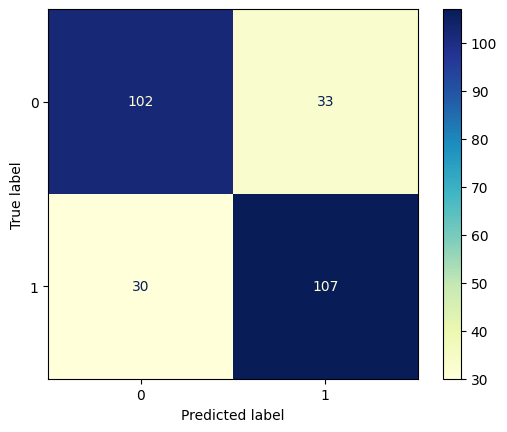

In [37]:
# Logistic regression model with L1 regularization
lr = LogisticRegression(max_iter=20000, penalty='l1', solver='liblinear')

# Fit the model on the training data
model_lr = lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Print accuracy scores for training and test sets
print("Train Accuracy:", model_lr.score(X_train, y_train))
print("Test Accuracy:", model_lr.score(X_test, y_test))
print("\n")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='YlGnBu')

In [38]:
# Get the absolute values of the logistic regression coefficients
coefs = np.abs(model_lr.coef_[0])
feature_names = X.columns

# Create a DataFrame to map features to their importance
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefs
}).sort_values(by='Importance', ascending=False)

# Display the top 5 most important features
top_5 = coef_df.head(5)
print("Top 5 Important Features:")
print(top_5)

Top 5 Important Features:
                 Feature  Importance
10               alcohol    5.400195
6   total sulfur dioxide    4.025560
1       volatile acidity    3.543764
9              sulphates    2.860157
4              chlorides    1.593824


### 3.1.2. Decision Tree Classifier

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


c:\Users\etzko\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Train Accuracy: 0.781048758049678
Test Accuracy: 0.7463235294117647

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.67      0.72       135
           1       0.72      0.82      0.77       137

    accuracy                           0.75       272
   macro avg       0.75      0.75      0.74       272
weighted avg       0.75      0.75      0.74       272

Confusion Matrix


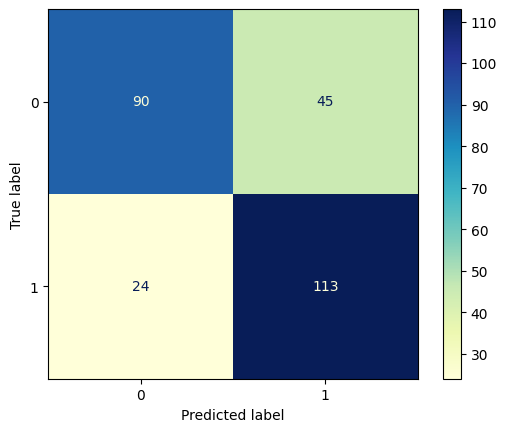

In [39]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search over
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],         # Splitting criteria
    'max_depth': [None, 5, 10, 20, 30],                   # Maximum tree depth
    'min_samples_split': [2, 5, 10],                      # Min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                        # Min samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']}               # Number of features to consider when looking for the best split

# Perform grid search with cross-validation
grid_search = grid_s(dt)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_dt = grid_search.best_estimator_

# Predict using the best model
y_pred = best_dt.predict(X_test)

# Evaluate performance
clas_report(best_dt)

In [40]:
# Display the top 5 most important features from the best decision tree model
best_features(best_dt)

Top 5 Most Important Features:
                 Feature  Importance
10               alcohol    0.556345
6   total sulfur dioxide    0.135229
9              sulphates    0.119544
1       volatile acidity    0.102039
0          fixed acidity    0.025907


### 3.1.3. Random Forest Classifier

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Train Accuracy: 0.9825206991720331
Test Accuracy: 0.7830882352941176

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       135
           1       0.76      0.82      0.79       137

    accuracy                           0.78       272
   macro avg       0.78      0.78      0.78       272
weighted avg       0.78      0.78      0.78       272

Confusion Matrix


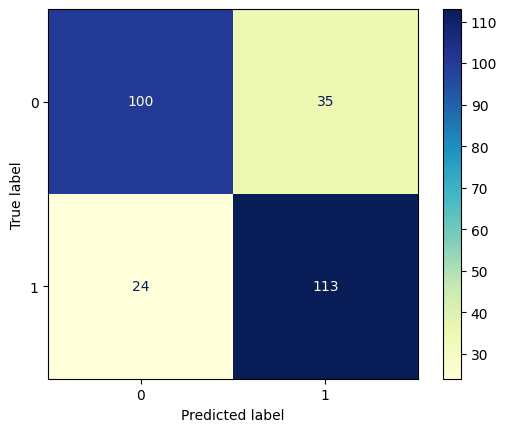

In [41]:
# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 300, 500],             # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],             # Max depth of each tree
    'min_samples_split': [2, 5],                 # Min samples required to split a node
    'min_samples_leaf': [1, 2],                  # Min samples required at a leaf node
    'max_features': ['sqrt', 'log2'],            # Number of features to consider at each split
    'criterion': ['gini', 'entropy']             # Function to measure the quality of a split
}

# Perform grid search with cross-validation
grid_search = grid_s(rf)
grid_search.fit(X_train, y_train)

# Retrieve the best model and make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
clas_report(best_rf)

Out of all the high-quality wines in the test set, 24 were incorrectly classified as low quality—these are referred to as false negatives. Since correctly identifying top-quality wines, particularly those with a score of 8, is especially important, we will now check how many of these 24 false negatives fall into the highest quality category.

In [42]:
# Create a DataFrame to compare true vs. predicted labels along with the original quality scores
results_df = pd.DataFrame({
    'true_label': y_test.reset_index(drop=True),                   # Actual binary class
    'predicted_label': pd.Series(y_pred, name='prediction'),      # Model prediction
    'original_quality': df.loc[y_test.index, 'quality'].reset_index(drop=True)})  # Original quality score (3–8)

# Identify False Negatives: Actual = 1 (high quality), Predicted = 0 (low quality)
false_negatives_df = results_df[(results_df['true_label'] == 1) & (results_df['predicted_label'] == 0)].copy()

# Identify False Positives: Actual = 0 (low quality), Predicted = 1 (high quality)
false_positives_df = results_df[(results_df['true_label'] == 0) & (results_df['predicted_label'] == 1)].copy()

In [43]:
false_negatives_df

,true_label,predicted_label,original_quality
17,1,0,6
33,1,0,6
44,1,0,6
48,1,0,6
57,1,0,6
75,1,0,6
86,1,0,6
91,1,0,6
113,1,0,6
117,1,0,6


Interestingly, almost all of the false negatives are wines with a quality score of 6. All quality 8 wines were correctly classified, which is a positive outcome given their importance.

Next, we will examine the true positives—high-quality wines that the model correctly identified.

In [44]:
# Identify True Positives: Actual = 1 (high quality), Predicted = 1 (correctly classified as high quality)
true_positives_df  = results_df[(results_df['true_label'] == 1) & (results_df['predicted_label'] == 1)].copy()

In [45]:
true_positives_df['original_quality'].value_counts()

original_quality
6    80
7    30
8     3
Name: count, dtype: int64

As we can see, there are only three wines with a quality score of 8 in the test set, while the majority of high-quality wines belong to the quality 6 category. 

In [46]:
# Display the top 5 most important features from the best Random Forest model
best_features(best_rf)

Top 5 Most Important Features:
                 Feature  Importance
10               alcohol    0.187878
9              sulphates    0.123045
6   total sulfur dioxide    0.108782
1       volatile acidity    0.107099
7                density    0.089244


### 3.1.4. XGB Classifier

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 150, 'subsample': 1.0}
Train Accuracy: 0.9981600735970562
Test Accuracy: 0.7683823529411765

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       135
           1       0.76      0.80      0.78       137

    accuracy                           0.77       272
   macro avg       0.77      0.77      0.77       272
weighted avg       0.77      0.77      0.77       272

Confusion Matrix


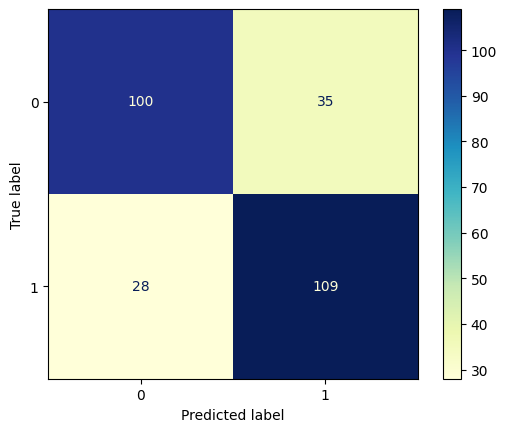

In [47]:
# Define the XGBoost classifier 
xgb = XGBClassifier(
    objective='binary:logistic',     # Binary classification objective
    eval_metric='logloss',           # Evaluation metric
    random_state=42)            


# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [80, 100, 150, 200, 300],     # Number of boosting rounds
    'max_depth': [2, 3, 6, 8, 10],                # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.3],            # Learning rate (shrinkage)
    'subsample': [0.8, 1.0],                      # Fraction of samples to use for each tree
    'colsample_bytree': [0.8, 1.0]}               # Fraction of features to consider per tree

# Perform GridSearchCV with cross-validation
grid_search = grid_s(xgb)
grid_search.fit(X_train, y_train)

# Retrieve the best model and make predictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Evaluate the model
clas_report(best_xgb)

In [48]:
# Display the top 5 most important features from the best XGBoost model
best_features(best_xgb)

Top 5 Most Important Features:
                 Feature  Importance
10               alcohol    0.264514
9              sulphates    0.103386
6   total sulfur dioxide    0.095733
1       volatile acidity    0.080599
0          fixed acidity    0.068420


### 3.1.5. Extra Trees Classifier

Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\etzko\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Train Accuracy: 0.9908003679852806
Test Accuracy: 0.7794117647058824

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.73      0.77       135
           1       0.76      0.82      0.79       137

    accuracy                           0.78       272
   macro avg       0.78      0.78      0.78       272
weighted avg       0.78      0.78      0.78       272

Confusion Matrix


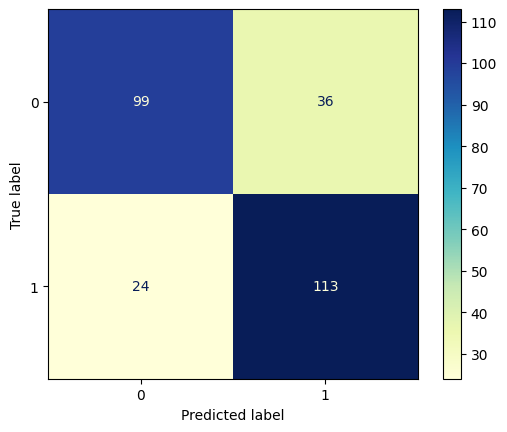

In [49]:
# Define the Extra Trees classifier
et = ExtraTreesClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 300, 500],         # Number of trees in the forest
    'max_depth': [None, 10, 20],             # Maximum tree depth
    'min_samples_split': [2, 5],             # Min samples required to split a node
    'min_samples_leaf': [1, 2],              # Min samples required at a leaf node
    'max_features': ['sqrt', 'log2'],        # Number of features to consider at each split
    'criterion': ['gini', 'entropy']}        # Function to measure split quality

# Perform grid search with cross-validation
grid_search = grid_s(et)
grid_search.fit(X_train, y_train)

# Retrieve the best model and make predictions
best_et = grid_search.best_estimator_
y_pred = best_et.predict(X_test)

# Evaluate the model
clas_report(best_et)

In [50]:
# Display the top 5 most important features from the best Extra Trees model
best_features(best_et)

Top 5 Most Important Features:
                 Feature  Importance
10               alcohol    0.212380
6   total sulfur dioxide    0.114610
1       volatile acidity    0.110058
9              sulphates    0.107377
7                density    0.078782


## 3.2.Binning Wine Quality: Grouping Scores 3–6: Low(0) and 7–8: High(1)

Since the previous binning strategy treated quality 6 wines as high quality—and there is a significant difference in the number of wines rated 6 compared to those rated 7 or 8—we now aim to explore an alternative binning approach. This adjustment will help us focus more specifically on the features that truly contribute to identifying quality 7 and 8 wines, which represent the highest levels of wine quality in our dataset.

In [51]:
# Convert quality scores to binary: 1 if quality > 6 (high), else 0 (low)
df_2["quality"] = np.where(df_2["quality"] > 6, 1, 0)
df_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


In [52]:
df_2.quality.value_counts()

quality
0    1175
1     184
Name: count, dtype: int64

However, with this new binning strategy, our quality classes have become quite imbalanced, with significantly fewer instances of high-quality wines (scores 7 and 8) compared to the lower-quality group.



In [53]:
y = df_2.pop("quality")
X = df_2

Therefore, we will use a stratified train-test split to address the class imbalance. Stratification ensures that both the training and test sets maintain approximately the same proportion of samples from each target class as in the original dataset, leading to more reliable model evaluation.

In [54]:
# Split the data into training and test sets with stratified sampling to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
# Scale features to the 0–1 range
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on training data and transform both training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3.2.1. Logistic Regression

In [56]:
# Train a logistic regression model with L1 regularization
lr = LogisticRegression(max_iter=20000, penalty='l1', solver='liblinear' )
model_lr = lr.fit(X_train, y_train)

# Print accuracy scores for training and test sets
print("Train accuracy:", model_lr.score(X_train, y_train))
print("Test accuracy:", model_lr.score(X_test, y_test))

# Predict on test data
y_pred = lr.predict(X_test)

print("\nClassification Report")
print(classification_report(y_test, y_pred)) 
print("Confusion Matrix")

Train accuracy: 0.8776448942042319
Test accuracy: 0.8786764705882353

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       235
           1       0.67      0.22      0.33        37

    accuracy                           0.88       272
   macro avg       0.78      0.60      0.63       272
weighted avg       0.86      0.88      0.85       272

Confusion Matrix


Even though the model shows high accuracy on both the training and test sets, this performance is largely driven by its ability to correctly classify low-quality wines. In contrast, the high-quality wines exhibit poor precision and recall, indicating that the model struggles to correctly identify and retrieve these less frequent but important cases.

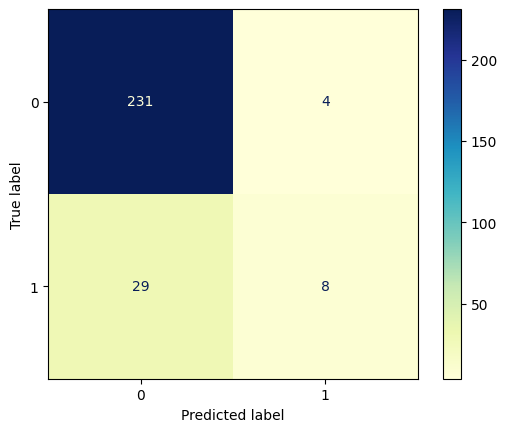

In [57]:
# Create the confusion matrix using the true and predicted labels
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap='YlGnBu')

### 3.2.2. Decision Tree Classifier

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Train Accuracy: 0.9254829806807727
Test Accuracy: 0.8602941176470589

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       235
           1       0.48      0.41      0.44        37

    accuracy                           0.86       272
   macro avg       0.70      0.67      0.68       272
weighted avg       0.85      0.86      0.86       272

Confusion Matrix


c:\Users\etzko\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



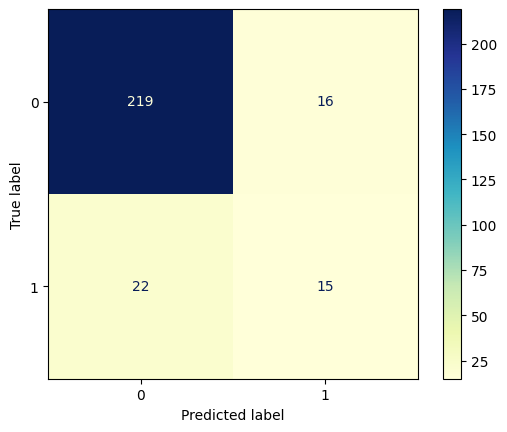

In [58]:
# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],   # Split quality metrics
    'max_depth': [None, 5, 10, 20, 30],             # Maximum tree depth
    'min_samples_split': [2, 5, 10],                # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Minimum samples required at a leaf node
    'max_features': [None, 'sqrt', 'log2']}         # Number of features to consider when looking for best split

# Perform Grid Search with cross-validation
grid_search = grid_s(dt)
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_dt = grid_search.best_estimator_

# Predict and evaluate the model
y_pred = best_dt.predict(X_test)
clas_report(best_dt)

Although the precision and recall for high-quality wines have improved compared to the results from logistic regression, the model still misclassifies more than half of the high-quality wines as low quality.

### 3.2.3. Random Forest Classifier

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Train Accuracy: 0.9788408463661453
Test Accuracy: 0.8860294117647058

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       235
           1       0.69      0.30      0.42        37

    accuracy                           0.89       272
   macro avg       0.79      0.64      0.68       272
weighted avg       0.87      0.89      0.87       272

Confusion Matrix


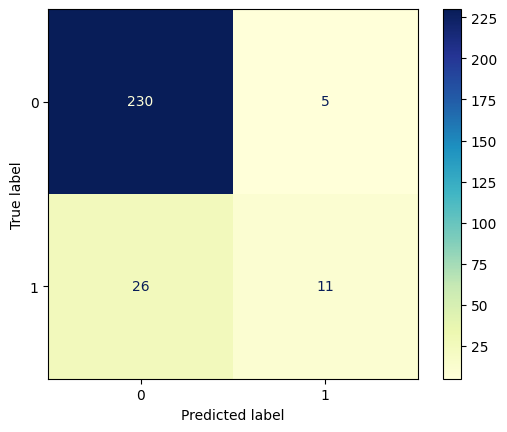

In [59]:
# Define the Random Forest model (class_weight not needed due to balanced classes)
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5],              # Min samples required to split an internal node
    'min_samples_leaf': [1, 2],               # Min samples required at each leaf node
    'max_features': ['sqrt', 'log2'],         # Number of features to consider when looking for best split
    'criterion': ['gini', 'entropy']}         # Function to measure the quality of a split

# Perform hyperparameter tuning with GridSearchCV
grid_search = grid_s(rf)
grid_search.fit(X_train, y_train)

# Retrieve the best model and make predictions
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate model performance
clas_report(best_rf)

### 3.2.4. XGB Classifier

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 80, 'subsample': 0.8}
Train Accuracy: 0.9402023919043239
Test Accuracy: 0.8713235294117647

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       235
           1       0.54      0.41      0.46        37

    accuracy                           0.87       272
   macro avg       0.72      0.68      0.69       272
weighted avg       0.86      0.87      0.86       272

Confusion Matrix


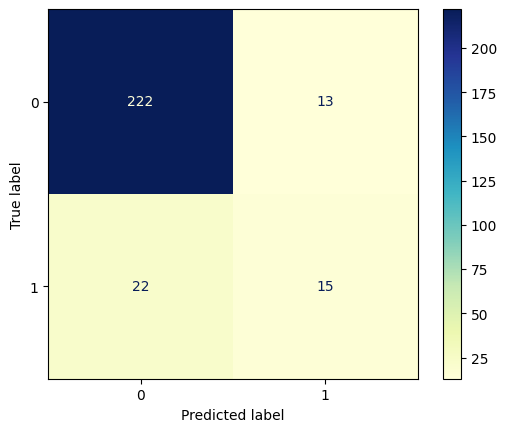

In [60]:
# Define the XGBoost model 
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss', random_state=42)             

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [80, 100, 150, 200, 300],  # Number of boosting rounds
    'max_depth': [2, 3, 6, 8, 10],             # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.3],         # Step size shrinkage
    'subsample': [0.8, 1.0],                   # Row subsampling
    'colsample_bytree': [0.8, 1.0]}             # Feature subsampling

# Perform GridSearchCV for hyperparameter tuning
grid_search = grid_s(xgb)
grid_search.fit(X_train, y_train)

# Retrieve the best model and make predictions
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Evaluate model performance
clas_report(best_xgb)

### 3.2.4. Extra Trees Classifier

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Train Accuracy: 0.9788408463661453
Test Accuracy: 0.8970588235294118

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       235
           1       0.91      0.27      0.42        37

    accuracy                           0.90       272
   macro avg       0.90      0.63      0.68       272
weighted avg       0.90      0.90      0.87       272

Confusion Matrix


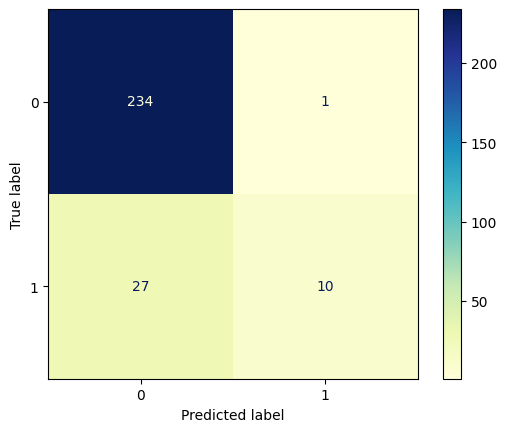

In [61]:
# Define the Extra Trees model
et = ExtraTreesClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 300, 500],         # Number of trees in the ensemble
    'max_depth': [None, 10, 20],             # Maximum depth of each tree
    'min_samples_split': [2, 5],             # Minimum samples required to split a node
    'min_samples_leaf': [1, 2],              # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2'],        # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']}        # Split quality criterion

# Perform GridSearchCV with cross-validation
grid_search = grid_s(et)
grid_search.fit(X_train, y_train)

# Get the best model and make predictions
best_et = grid_search.best_estimator_
y_pred = best_et.predict(X_test)

# Evaluate the model performance
clas_report(best_et)

## 3.3. Binning Wine Quality: Score 5: Low(0), Score 6: Middle(1) and 7–8: High(2)

The previous binning strategy included a large number of low-quality wine instances, which created a class imbalance. To address this, we will remove wines with quality scores of 3 and 4 from the dataset. Then, we will categorize the remaining wines as follows:

Quality 5 → Low Quality    

Quality 6 → Medium Quality      

Quality 7–8 → High Quality     

As a result, this task will now shift from binary classification to a multinomial (multi-class) classification problem.

In [62]:
# Remove rows where the 'quality' value is 3 or 4.
df_3 = df_3[~df_3['quality'].isin([3, 4])]

In [63]:
# Convert 'quality' into 3 classes: 0 for quality 5, 1 for quality 6, and 2 for quality 7 or 8
df_3['quality'] = df_3['quality'].apply(lambda x: 0 if x == 5 else (1 if x == 6 else 2))

In [64]:
df_3['quality'].value_counts().sort_index()

quality
0    577
1    535
2    184
Name: count, dtype: int64

In [65]:
X = df_3.drop(columns=['quality']) 
y = df_3['quality']   

In [66]:
# Split the dataset into training and test sets with stratified sampling to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size= 0.2, random_state= 42)

In [67]:
# Scale features to the 0–1 range
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler on the training data and transform both training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3.3.1 Logistic Regression

Train Accuracy: 0.6235521235521235
Test Accuracy: 0.6076923076923076

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.77      0.71       116
           1       0.55      0.56      0.56       107
           2       0.50      0.24      0.33        37

    accuracy                           0.61       260
   macro avg       0.57      0.52      0.53       260
weighted avg       0.60      0.61      0.59       260



c:\Users\etzko\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



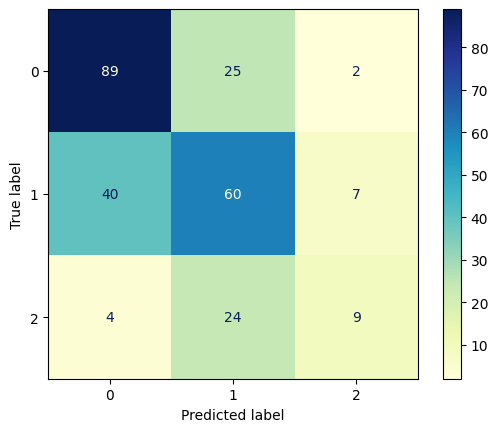

In [68]:
# Define and train a multinomial logistic regression model for multi-class classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='YlGnBu')

### 3.3.2. Decision Tree Classifier

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
Train Accuracy: 0.6698841698841699
Test Accuracy: 0.5961538461538461

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.66      0.67       116
           1       0.52      0.60      0.56       107
           2       0.61      0.38      0.47        37

    accuracy                           0.60       260
   macro avg       0.60      0.55      0.56       260
weighted avg       0.60      0.60      0.59       260

Confusion Matrix


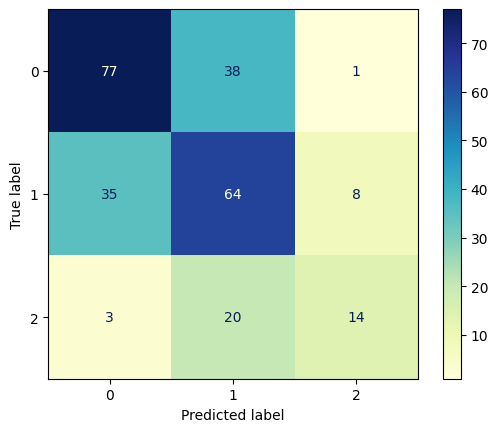

In [69]:
# Define the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],   # Split quality metrics
    'max_depth': [None, 5, 10, 20, 30],             # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],                  # Minimum number of samples at a leaf node
    'max_features': [None, 'sqrt', 'log2']}         # Number of features to consider at each split

# Perform GridSearchCV for hyperparameter tuning
grid_search = grid_s(dt)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_dt = grid_search.best_estimator_

# Predict and evaluate the model
y_pred = best_dt.predict(X_test)
clas_report(best_dt)

### 3.3.3. Random Forest Classifier

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}
Train Accuracy: 0.9787644787644788
Test Accuracy: 0.6269230769230769

Classification Report
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       116
           1       0.56      0.61      0.58       107
           2       0.56      0.38      0.45        37

    accuracy                           0.63       260
   macro avg       0.61      0.57      0.58       260
weighted avg       0.63      0.63      0.62       260

Confusion Matrix


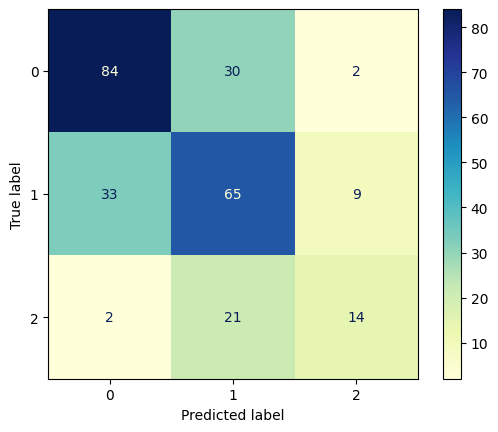

In [70]:
# Define the Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 300, 500],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples at a leaf node
    'max_features': ['sqrt', 'log2'],        # Number of features to consider at each split
    'criterion': ['gini', 'entropy']}        # Function to measure the quality of a split


# Perform GridSearchCV for hyperparameter tuning
grid_search = grid_s(rf)
grid_search.fit(X_train, y_train)

# Retrieve the best model
best_rf = grid_search.best_estimator_

# Make predictions and evaluate the model
y_pred = best_rf.predict(X_test)
clas_report(best_rf)


### 3.3.4. XGB Classifier

Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\etzko\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\core.py:158: UserWarning:

[14:13:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Train Accuracy: 1.0
Test Accuracy: 0.5961538461538461

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       116
           1       0.52      0.54      0.53       107
           2       0.55      0.46      0.50        37

    accuracy                           0.60       260
   macro avg       0.58      0.56      0.57       260
weighted avg       0.60      0.60      0.60       260

Confusion Matrix


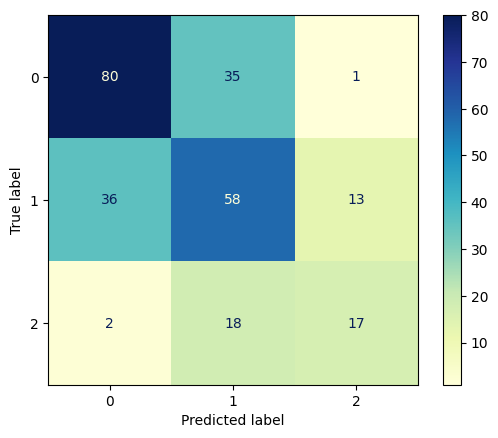

In [71]:
# Define the XGBoost model for multiclass classification
xgb = XGBClassifier(
    objective='multi:softmax',   
    num_class=3,                  # Specify number of classes
    use_label_encoder=False,      
    eval_metric='mlogloss',       # Multiclass log loss as the evaluation metric
    random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 300],           # Number of boosting rounds
    'max_depth': [3, 6, 10],              # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.3],    # Learning rate
    'subsample': [0.8, 1.0],              # Row subsampling
    'colsample_bytree': [0.8, 1.0]}       # Feature subsampling

# Perform GridSearchCV to find the best hyperparameters
grid_search = grid_s(xgb)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_xgb = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_xgb.predict(X_test)

# Evaluate the model
clas_report(best_xgb)

### 3.3.5. Extra Trees Classifier

Fitting 5 folds for each of 144 candidates, totalling 720 fits


c:\Users\etzko\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning:

invalid value encountered in cast



Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Train Accuracy: 1.0
Test Accuracy: 0.5961538461538461

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       116
           1       0.53      0.52      0.53       107
           2       0.50      0.35      0.41        37

    accuracy                           0.60       260
   macro avg       0.57      0.54      0.55       260
weighted avg       0.59      0.60      0.59       260

Confusion Matrix


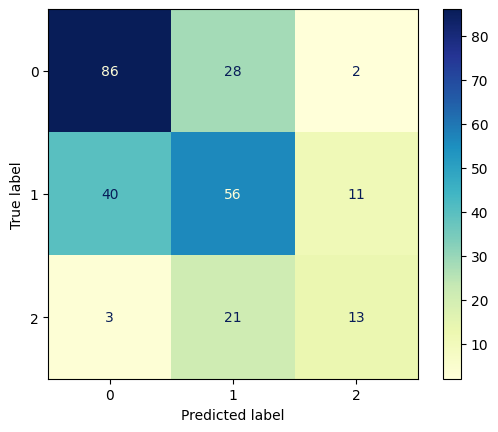

In [72]:
# Define the Extra Trees model
et = ExtraTreesClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 300, 500],         # Number of trees in the ensemble
    'max_depth': [None, 10, 20],             # Maximum depth of each tree
    'min_samples_split': [2, 5],             # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2],              # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2'],        # Number of features to consider at each split
    'criterion': ['gini', 'entropy']}        # Function to measure the quality of a split

# Perform GridSearchCV with cross-validation
grid_search = grid_s(et)
grid_search.fit(X_train, y_train)

# Retrieve the best model and make predictions
best_et = grid_search.best_estimator_
y_pred = best_et.predict(X_test)

# Evaluate the model
clas_report(best_et)

Although our classification results have improved compared to the previous binning strategy, the models still struggle to accurately recognize high-quality wines, indicating that distinguishing this class remains a challenge.

# 4. Conclusion

## 4.1. Objective of the Project

The objective of this project is to identify the key factors that contribute to high wine quality ratings and, based on these insights, to provide recommendations for optimal feature ranges that characterize outstanding wines.

## 4.2. Data Preparation Highlights
- Removed 240 duplicate entries to ensure data integrity

- Confirmed that there were no missing values in the dataset

- Treated the quality column as an ordinal variable, acknowledging the ordered but non-uniform nature of the ratings

- Created both binary and multinomial classification labels to address class imbalance and support different modeling approaches



## 4.3. Key Findings from Explorative Data Analysis

From the scatter plot, we observed that some features were strongly correlated, indicating potential multicollinearity in the dataset.

Using the correlation matrix, we gained initial insights:
- Alcohol, sulphates, and citric acid showed a positive correlation with wine quality
- Volatile acidity and density were negatively associated with quality

These findings were further supported and refined through box plots, which visualized the relationship between wine quality and the top five features. These visualizations helped us better understand the influence of each feature across different quality levels.

## 4.4. Modeling and Feature Selection

To identify the most influential features, we applied both tree-based models and logistic regression with L1 regularization (Lasso) for feature selection.

Rather than focusing solely on overall accuracy, we paid special attention to precision and recall, particularly for the high-quality wine predictions, as correctly identifying top-quality wines was a key goal of this project.

To ensure the robustness of our models and avoid overfitting, we evaluated performance on both the training and test sets. Among the various binning strategies we explored, the initial split—grouping quality scores 3–5 as low and 6–8 as high—delivered the best test accuracy and served as the baseline for further analysis.

## 4.5. Challenges Encountered

- **Multicollinearity:**
Early in the analysis, we identified that several features were highly correlated. This multicollinearity made it difficult to interpret which features truly influenced wine quality, as the models could assign importance inconsistently across overlapping variables. To address this, we prioritized tree-based models and L1-regularized logistic regression, which are better suited for handling such redundancy and isolating important features.

- **Class Imbalance:**
The dataset initially contained an uneven distribution of quality scores, with mid-range wines (particularly quality 5 and 6) dominating the sample. This imbalance posed a risk of biasing the models toward the majority class. We tackled this issue by applying binning strategies to group quality scores more meaningfully and used stratified train-test splits to preserve class proportions during model training and evaluation.

## 4.6. Final Model Performance

The best-performing model was the Random Forest classifier using the binning strategy that grouped quality scores 3–5 as Low (0) and 6–8 as High (1). This model achieved the lowest number of false positives and false negatives, making it the most reliable in distinguishing wine quality.

The top five features identified by this model, in order of importance, were:
alcohol, sulphates, total sulfur dioxide, volatile acidity, and density.

Interestingly, across different models using the same binning strategy, the top features remained largely consistent, though the order of importance (reihenfolge) varied slightly. This consistency supports the reliability of our findings.

Overall, these results confirm the insights gained during exploratory data analysis, particularly the significant roles of alcohol and sulphates. One exception was citric acid, which showed a strong correlation with quality in the EDA but did not appear among the top five features in the classification models.


## 4.7. Conclusion

Our analysis revealed several clear patterns in how individual features relate to wine quality:

- **Alcohol:** Starting from quality level 5, wines with higher alcohol content generally received higher quality ratings. The highest quality wines had an alcohol content of at least 9.8%, reinforcing its strong positive influence.

- **Sulphates:** Wines with higher sulphate levels also tended to score higher in quality. The top-rated wines typically had sulphate levels between 0.63 and 1.1.

- **Volatile Acidity:** Lower volatile acidity was consistently associated with higher quality. The best wines had volatile acidity levels ranging from 0.26 to 0.62, supporting the view that reduced volatility improves perception.

- **Density:** Better quality wines tended to have lower density, with the highest quality wines not exceeding a density of 0.9988.

- **Total Sulfur Dioxide:** This feature was more difficult to interpret. No clear trend emerged across different quality levels, suggesting that more data from the lowest and highest quality wines may be needed to draw a reliable conclusion about its influence.

